In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

<AxesSubplot:xlabel='count', ylabel='anaemia'>

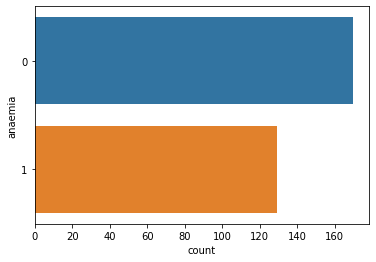

In [ ]:
sns.countplot(y='anaemia',data=df)

<AxesSubplot:xlabel='count', ylabel='diabetes'>

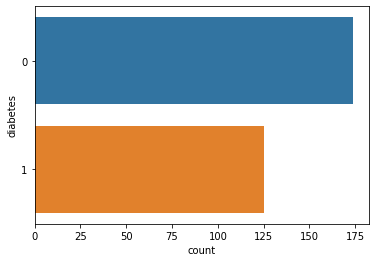

In [ ]:
sns.countplot(y='diabetes',data=df)

<AxesSubplot:xlabel='count', ylabel='DEATH_EVENT'>

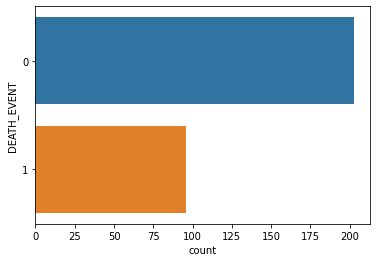

In [ ]:
sns.countplot(y='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='diabetes', ylabel='DEATH_EVENT'>

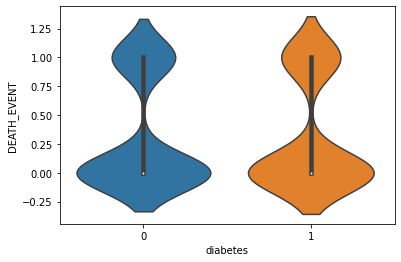

In [ ]:
sns.violinplot(x='diabetes', y='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='smoking', ylabel='DEATH_EVENT'>

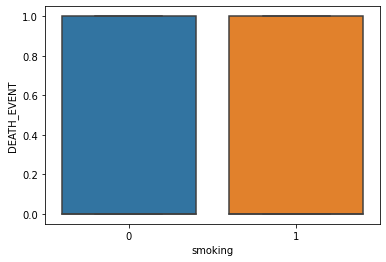

In [ ]:
sns.boxplot(x='smoking', y='DEATH_EVENT', data=df)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_test=scaler.transform(x_test)
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
161,45.0,1,130,0,35,0,174000.0,0.8,139,1,1,121
260,55.0,0,66,0,40,0,203000.0,1.0,138,1,0,233
218,68.0,1,1021,1,35,0,271000.0,1.1,134,1,0,197
123,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95
39,60.0,0,235,1,38,0,329000.0,3.0,142,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
203,60.0,0,59,0,25,1,212000.0,3.5,136,1,1,187
255,52.0,1,191,1,30,1,334000.0,1.0,142,1,1,216
72,85.0,0,5882,0,35,0,243000.0,1.0,132,1,1,72
235,77.0,1,109,0,50,1,406000.0,1.1,137,1,0,209


In [ ]:
import tensorflow as tf
ann=tf.keras.models.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 4853.8320 - accuracy: 0.6109
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 492.8883 - accuracy: 0.5272
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 76.2138 - accuracy: 0.5607
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 62.3101 - accuracy: 0.5732
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 178.5472 - accuracy: 0.5900
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 174.3642 - accuracy: 0.5356
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 106.3678 - accuracy: 0.4937
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 71.5414 - accuracy: 0.5816
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 189.3959 - accuracy: 0.5397
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 209.9962 - accuracy

In [ ]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 1)                 13        
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred=ann.predict(scaler.transform([[75,1,246,0,15,0,127000,1.2,137,1,0,10,]]))
if(pred>0.5):
  print(1)
else:
  print(0)

1/1 [==============================] - 0s 26ms/step
1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
